In [3]:
#import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Matplot lib graph settings
plt.style.use('dark_background') 
plt.rcParams["figure.figsize"] = (12,8)

In [5]:
# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
# import make_moons from sklearn
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html?highlight=make%20moons#sklearn.datasets.make_moons
from sklearn.datasets import make_moons

# import DBSCAN
from sklearn.cluster import DBSCAN

In [7]:
db = DBSCAN(eps=0.5,#eps: The maximum distance between two samples for one to be considered as being in the neighborhood of the other.(not a max bound)
            min_samples=5,#min # of points to be considered in a neighboor region to be considered a core (otherwise its a frontier)
            metric='euclidean')p

In [8]:
# fit and predicr
y_db = db.fit_predict(X)

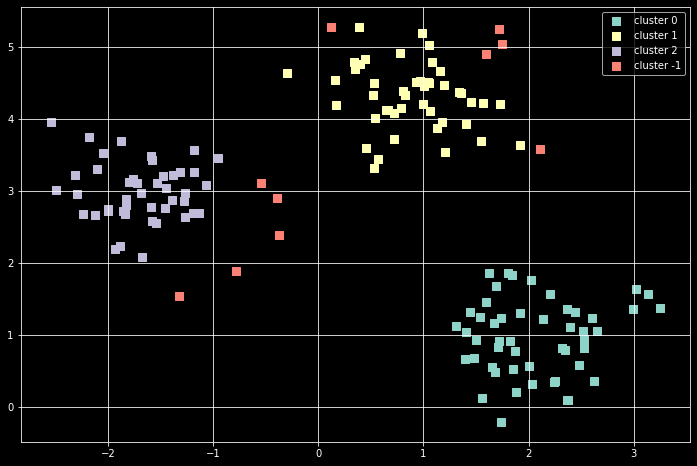

In [9]:
# Plot DBSCAN clusters
plot_clusters(X,y_db)

## Non-spherical Data

In all the previously used examples, we used spherical-shape data in which all of the algorithms (k-means, Agglomerative clustering, and DBSCAN) performed almost identically well. But what happens when we try "moon-shaped" data? Let's find out:

In [11]:
# generate moon-shape data
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)

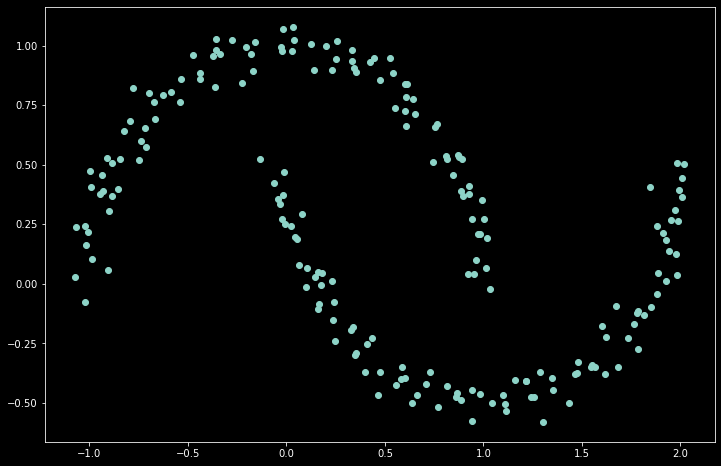

In [12]:
# plot data
plt.scatter(X[:,0], X[:,1])
plt.show()

### K-mean answer

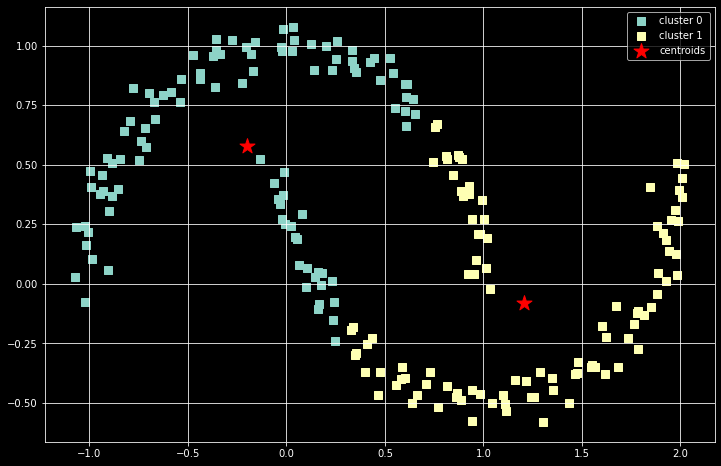

In [13]:
# import k-means
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10,
            random_state=0,)

y_km = km.fit_predict(X)

# plot K-means clusters
plot_clusters(X,y_km,plt_cluster_centers=True)


### Hierarchical answer

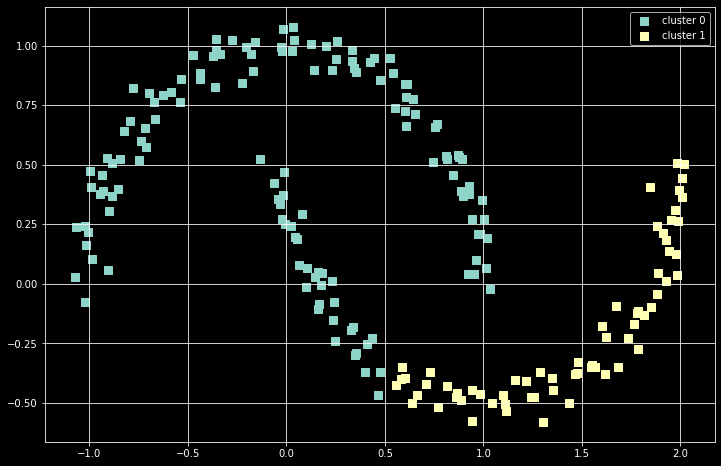

In [15]:
# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# fit Agglomerative clustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
y_hc = ac.fit_predict(X)

# plot HC clusters
plot_clusters(X,y_hc)

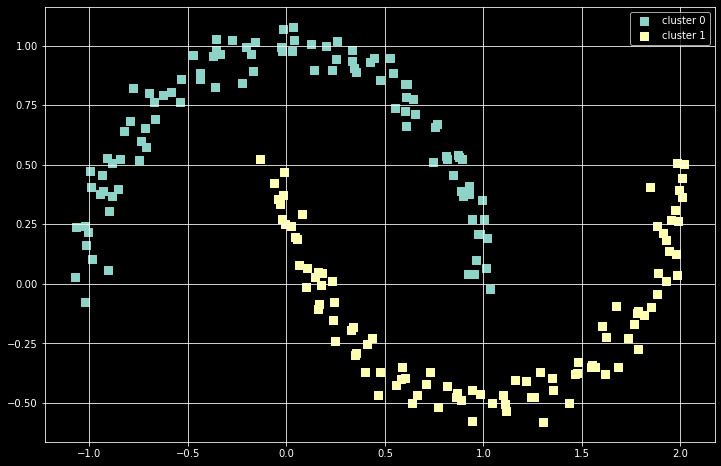

In [16]:
# fit DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

# plot DBSCAN clusters
plot_clusters(X,y_db)